<p style='text-align: justify;'>
<b>Author</b>: Abzer Kelminal (abzer.shah@uni-tuebingen.de) adapted from the scripts of Madeleine Ernst (mernst@ucsd.edu), Ricardo Silva (ridasilva@ucsd.edu) <br>
<b>Edited by</b>: - <br>
<b>Use case</b>: Test for association between paired samples (feature vs metadata and feature vs feature), using the Pearson's product moment correlation coefficient. The Notebook combines the asv and feature tables and creates a decoy set, calculates the correlation scores for both target and decoy tables. Finally, FDR is also calculated<br>
<b>Input file format</b>: .csv tables of asv files and feature table. <br>
<b>Outputs</b>: .csv table showing correlation coefficient values  <br>
<b>Dependencies</b>: R version 3.4.2 (2017-09-28) and libraries  ggplot2, dplyr, varhandle, reshape2</p>

## Load the ASVs and Feature table

In [ ]:
install.packages(c("ggplot2","dplyr","varhandle","reshape2","svglite")) 

In [1]:
require(ggplot2) #For Plots
require(dplyr)  # For data manipulation
require(varhandle) # Mainly for using unfactor function to convert factor to integer values
require(reshape2) # Mainly for using 'melt' function
require(svglite) #to save plots in svg format

Loading required package: ggplot2
Loading required package: dplyr
Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Loading required package: varhandle
Warning message:
"package 'varhandle' was built under R version 3.6.2"Loading required package: reshape2
Warning message:
"package 'reshape2' was built under R version 3.6.3"

#### 'Global' settings for plot size in the output cell:

In [325]:
#options(repr.plot.width=10, repr.plot.height=8,res=600) #For google collab
options(repr.plot.width=6, repr.plot.height=6) #For Jupyter Notebook

In [3]:
# setting the current directory as the working directory
Directory <- normalizePath(readline("Enter the path of the folder with input files: "),"/",mustWork=FALSE)
setwd(Directory)

Enter the path of the folder with input files: D:\Projects\20220811_CCE_Correlation


In [4]:
asv16s <- read.csv("ASV_16S_With_Metadata.csv",header=TRUE,check.names = FALSE,row.names = 1)
asv18s <- read.csv("ASV_18SV9_FullDepth_With_Metadata.csv",header=TRUE,check.names = FALSE,row.names = 1)
FT <-  read.csv("CCE_Normalised_Data.csv",header=TRUE,check.names = FALSE,row.names = 1)

Note that the asv files used are the ones with meatadata combined with them.

In [122]:
head(asv16s)
dim(asv16s)

,CCE_P1706_100.mzxml,CCE_P1706_102.mzxml,CCE_P1706_104.mzxml,CCE_P1706_106.mzxml,CCE_P1706_108.mzxml,CCE_P1706_110.mzxml,CCE_P1706_112.mzxml,CCE_P1706_114.mzxml,CCE_P1706_116.mzxml,CCE_P1706_118.mzxml,...,CCE_P1706_96.mzxml,CCE_P1706_98.mzxml,Class16S,Confidence,Domain16S,Family16S,Genus16S,Order16S,Phylum16S,Species16S
00208b62ef66aa36e069777b853c8f17,0,0,0,0,0,0,0,0,0,0,...,0,0,Deltaproteobacteria,0.8284995,Bacteria,NA,NA,SAR324 clade(Marine group B),Proteobacteria,NA
00232f374cfc930f3fffbaef0d0c6d80,0,0,0,0,0,0,0,0,0,0,...,0,0,Gammaproteobacteria,1.0000000,Bacteria,NA,NA,NA,Proteobacteria,NA
0023a8c071538909ed3386e4e1d52278,0,0,0,0,0,0,0,0,0,0,...,0,0,Ignavibacteria,0.7360358,Bacteria,uncultured organism,uncultured organism,OPB56,Bacteroidetes,uncultured organism
00256e2eb0d211a7498c3e8b3170cedd,0,0,0,0,0,0,7,0,0,0,...,0,0,NA,0.9999943,Bacteria,NA,NA,NA,Marinimicrobia (SAR406 clade),NA
002ae12276a5da377dd6f7d5452a388a,0,0,0,0,0,0,10,0,0,0,...,0,0,Bacteroidia,0.9964438,Bacteria,NS9 marine group,NA,Flavobacteriales,Bacteroidetes,NA
002c14075180e4484913e02e02dead50,0,0,0,0,0,0,0,0,0,0,...,0,0,Bacteroidia,0.9999990,Bacteria,Crocinitomicaceae,Crocinitomix,Flavobacteriales,Bacteroidetes,uncultured Bacteroidetes/Chlorobi group bacterium


[1] 7538   79

<p style='text-align: justify;'>The observed dimension above was 7538 rows and 79 columns. Out of this 79, <b> 8 columns were metadata info </b> (Class16S, Confidence, Domain16S, Family16S, Genus16S, Order16S, Phylum16S, Species16S). Thus, 71 files in asv16s dataframe.</p>

In [123]:
head(asv18s)
dim(asv18s)

,CCE_P1706_100.mzxml,CCE_P1706_102.mzxml,CCE_P1706_104.mzxml,CCE_P1706_106.mzxml,CCE_P1706_108.mzxml,CCE_P1706_110.mzxml,CCE_P1706_112.mzxml,CCE_P1706_114.mzxml,CCE_P1706_116.mzxml,CCE_P1706_118.mzxml,...,Class18SV9,Confidence,Domain18SV9,Family18SV9,Genus18SV9,Kingdom18SV9,Order18SV9,Phylum18SV9,Species18SV9,X
000167ce642266c21c62843e4a010266,0,0,0,0,0,0,0,0,0,0,...,Acantharea,0.9991760,Eukaryota,Acantharea_XX,Acantharea_XXX,Rhizaria,Acantharea_X,Radiolaria,Acantharea_XXX_sp.,6114
001567b7cb76eecd73f31a288fcfcb69,0,0,0,0,0,0,0,0,0,0,...,NA,0.7359983,Eukaryota,NA,NA,Stramenopiles,NA,NA,NA,9879
0018f741aa09de859e5af52f19a2b7c1,0,0,0,0,0,0,0,0,0,0,...,NA,1.0000000,Eukaryota,NA,NA,NA,NA,NA,NA,5051
00236daa14e0b5a92c512b565be61b51,0,0,0,0,0,0,0,0,0,0,...,Chlorophyceae,0.8520327,Eukaryota,NA,NA,Archaeplastida,NA,Chlorophyta,NA,9634
003695728276f773ed0c54ca361198e2,0,0,0,0,0,0,0,0,0,0,...,NA,1.0000000,Eukaryota,NA,NA,NA,NA,NA,NA,5130
0038284216ef9b1f951a5f4e5d4a3aea,0,0,0,0,0,0,0,0,0,0,...,Pyramimonadales,0.9981855,Eukaryota,Pyramimonadales_XX,Halosphaera,Archaeplastida,Pyramimonadales_X,Chlorophyta,Halosphaera_sp.,2268


[1] 10286    81

<p style='text-align: center;'> Dimension for ASV 18SV9 = 10286 rows and 81 columns </p>
<p style='text-align: justify;'>More features observed with ASV18SV9 (10286 rows) and <b> there are 10 metadata columns:</b> Class18SV9, Confidence, Domain18SV9, Family18SV9, Genus18SV9, Kingdom18SV9, Order18SV9, Phylum18SV9, Species18SV9, X </p>

In [184]:
# Removing the last 4 metadata rows from the ASV files and making all CCE column data as numerci data 
asv16s_temp <- asv16s[-c((nrow(asv16s)-3):nrow(asv16s)),] 
asv16s_temp2 <- unfactor(asv16s_temp[,1:71])
asv16s_f <- cbind(asv16s_temp2, asv16s_temp[,72:ncol(asv16s_temp)])

asv18s_temp <- asv18s[-c((nrow(asv18s)-3):nrow(asv18s)),]
asv18s_temp2 <- unfactor(asv18s_temp[,1:71])
asv18s_f <- cbind(asv18s_temp2, asv18s_temp[,72:ncol(asv18s_temp)])

In [209]:
#Checking the dimensions of new asv tables
dim(asv16s_f)
dim(asv18s_f)

[1] 7534   79

[1] 10282    81

In [185]:
head(FT)
dim(FT)

,CCE_P1706_3.mzxml,CCE_P1706_4.mzxml,CCE_P1706_5.mzxml,CCE_P1706_6.mzxml,CCE_P1706_7.mzxml,CCE_P1706_8.mzxml,CCE_P1706_9.mzxml,CCE_P1706_10.mzxml,CCE_P1706_11.mzxml,CCE_P1706_12.mzxml,...,CCE_P1706_221.mzxml,CCE_P1706_222.mzxml,CCE_P1706_223.mzxml,CCE_P1706_224.mzxml,CCE_P1706_225.mzxml,CCE_P1706_226.mzxml,CCE_P1706_227.mzxml,CCE_P1706_228.mzxml,CCE_P1706_229.mzxml,CCE_P1706_230.mzxml
2492_150.13_0,0.000002930,0.000003690,0.000002740,0.000002070,0.000002440,0.000002820,0.000003100,0.000003410,0.000002880,0.000002520,...,0.000003170,0.000002800,0.00001180,0.000002830,0.000236714,0.000290522,0.000211238,0.000274079,0.000278415,0.000238976
129_151.03_0.001,0.001334518,0.002481587,0.000511703,0.001005175,0.000644174,0.000825979,0.001663834,0.002546505,0.001957699,0.000847911,...,0.001099565,0.000564127,0.00100717,0.001223748,0.001730357,0.000188482,0.001106029,0.001532877,0.000374890,0.000320765
1112_151.03_0,0.000002930,0.000003690,0.000002740,0.000002070,0.000002440,0.000002820,0.000003100,0.000002550,0.000002880,0.000002520,...,0.000003170,0.000002800,0.00000247,0.000002830,0.000001730,0.000002040,0.000001860,0.000001910,0.000001850,0.000001930
3075_151.07_0,0.000002930,0.000003690,0.000002740,0.000002070,0.000002440,0.000002820,0.000003100,0.000002550,0.000002880,0.000002520,...,0.000003170,0.000002800,0.00000247,0.000002830,0.000001730,0.000002040,0.000001860,0.000001910,0.000001850,0.000001930
542_152.06_0,0.000012900,0.000007100,0.000022900,0.000002070,0.000002440,0.000002820,0.000003100,0.000002550,0.000002880,0.000002520,...,0.000027100,0.000010500,0.00003350,0.000025900,0.000014400,0.000010400,0.000019900,0.000008700,0.000009800,0.000007410
31563_153_0,0.000002930,0.000003690,0.000002740,0.000002070,0.000002440,0.000002820,0.000003100,0.000002550,0.000002880,0.000002520,...,0.000003170,0.000002800,0.00000247,0.000002830,0.000001730,0.000002040,0.000001860,0.000001910,0.000001850,0.000001930


[1] 10644   228

Dimension of feature table = 10644 features, 230 columns. Only considering the files belonging to different cycles (Cycles 1-4), --> there are only 144 files. 

## Combine the ASVs with the feature table:

Now changing the rownames of FT as combined name of row ID, m/z value and RT and **subsetting the top 2000 abundant features in feature table:**

In [186]:
rownames(FT) <- paste(rownames(FT),round(FT[,1],digits = 2),round(FT[,3],digits = 3), sep = '_')
FT <- FT[,-1:-2]

#lets subset ft based on top 2000 abundant features
ft_new <- FT #calling FT under a new name: ft_new
ft_new$avg <- rowMeans(ft_new) # getting the average of each row (or each feature) under a new column "avg"
ft_new <- ft_new[with(ft_new,order(-avg)),] # arranged in descending order of avg
ft_new <- ft_new[1:2000,]  # Taken the top 2000 features

ft <- ft_new[,1:(ncol(ft_new)-1)] #removing the avg column

The order of taxonomic levels: Domain, Kingdom, Phylum or division, class, order, family, genus, species. Lets arrange the ASV files in that order. And we are planning to do the analysis only until genus level and not to the species level

In [187]:
print(colnames(asv16s_f))

 [1] "CCE_P1706_100.mzxml" "CCE_P1706_102.mzxml" "CCE_P1706_104.mzxml"
 [4] "CCE_P1706_106.mzxml" "CCE_P1706_108.mzxml" "CCE_P1706_110.mzxml"
 [7] "CCE_P1706_112.mzxml" "CCE_P1706_114.mzxml" "CCE_P1706_116.mzxml"
[10] "CCE_P1706_118.mzxml" "CCE_P1706_120.mzxml" "CCE_P1706_122.mzxml"
[13] "CCE_P1706_154.mzxml" "CCE_P1706_156.mzxml" "CCE_P1706_158.mzxml"
[16] "CCE_P1706_160.mzxml" "CCE_P1706_162.mzxml" "CCE_P1706_164.mzxml"
[19] "CCE_P1706_166.mzxml" "CCE_P1706_168.mzxml" "CCE_P1706_170.mzxml"
[22] "CCE_P1706_172.mzxml" "CCE_P1706_174.mzxml" "CCE_P1706_176.mzxml"
[25] "CCE_P1706_178.mzxml" "CCE_P1706_180.mzxml" "CCE_P1706_182.mzxml"
[28] "CCE_P1706_184.mzxml" "CCE_P1706_186.mzxml" "CCE_P1706_188.mzxml"
[31] "CCE_P1706_208.mzxml" "CCE_P1706_210.mzxml" "CCE_P1706_212.mzxml"
[34] "CCE_P1706_214.mzxml" "CCE_P1706_216.mzxml" "CCE_P1706_218.mzxml"
[37] "CCE_P1706_220.mzxml" "CCE_P1706_222.mzxml" "CCE_P1706_224.mzxml"
[40] "CCE_P1706_228.mzxml" "CCE_P1706_230.mzxml" "CCE_P1706_40.mzxml" 
[43] "

In [188]:
asv16s_new <- asv16s_f[,-79] #removing species column
asv16s_new <- asv16s_new[ ,order(names(asv16s_new))] #order the asv16s_new table according to its colnames order
name_16s <- colnames(asv16s_new)
print(name_16s) #checking the colnames

 [1] "CCE_P1706_100.mzxml" "CCE_P1706_102.mzxml" "CCE_P1706_104.mzxml"
 [4] "CCE_P1706_106.mzxml" "CCE_P1706_108.mzxml" "CCE_P1706_110.mzxml"
 [7] "CCE_P1706_112.mzxml" "CCE_P1706_114.mzxml" "CCE_P1706_116.mzxml"
[10] "CCE_P1706_118.mzxml" "CCE_P1706_120.mzxml" "CCE_P1706_122.mzxml"
[13] "CCE_P1706_154.mzxml" "CCE_P1706_156.mzxml" "CCE_P1706_158.mzxml"
[16] "CCE_P1706_160.mzxml" "CCE_P1706_162.mzxml" "CCE_P1706_164.mzxml"
[19] "CCE_P1706_166.mzxml" "CCE_P1706_168.mzxml" "CCE_P1706_170.mzxml"
[22] "CCE_P1706_172.mzxml" "CCE_P1706_174.mzxml" "CCE_P1706_176.mzxml"
[25] "CCE_P1706_178.mzxml" "CCE_P1706_180.mzxml" "CCE_P1706_182.mzxml"
[28] "CCE_P1706_184.mzxml" "CCE_P1706_186.mzxml" "CCE_P1706_188.mzxml"
[31] "CCE_P1706_208.mzxml" "CCE_P1706_210.mzxml" "CCE_P1706_212.mzxml"
[34] "CCE_P1706_214.mzxml" "CCE_P1706_216.mzxml" "CCE_P1706_218.mzxml"
[37] "CCE_P1706_220.mzxml" "CCE_P1706_222.mzxml" "CCE_P1706_224.mzxml"
[40] "CCE_P1706_228.mzxml" "CCE_P1706_230.mzxml" "CCE_P1706_40.mzxml" 
[43] "

In [189]:
name_16s[72:78] <- c( "Domain16S","Phylum16S","Class16S" ,"Order16S","Family16S","Genus16S", "Confidence")
print(name_16s)

 [1] "CCE_P1706_100.mzxml" "CCE_P1706_102.mzxml" "CCE_P1706_104.mzxml"
 [4] "CCE_P1706_106.mzxml" "CCE_P1706_108.mzxml" "CCE_P1706_110.mzxml"
 [7] "CCE_P1706_112.mzxml" "CCE_P1706_114.mzxml" "CCE_P1706_116.mzxml"
[10] "CCE_P1706_118.mzxml" "CCE_P1706_120.mzxml" "CCE_P1706_122.mzxml"
[13] "CCE_P1706_154.mzxml" "CCE_P1706_156.mzxml" "CCE_P1706_158.mzxml"
[16] "CCE_P1706_160.mzxml" "CCE_P1706_162.mzxml" "CCE_P1706_164.mzxml"
[19] "CCE_P1706_166.mzxml" "CCE_P1706_168.mzxml" "CCE_P1706_170.mzxml"
[22] "CCE_P1706_172.mzxml" "CCE_P1706_174.mzxml" "CCE_P1706_176.mzxml"
[25] "CCE_P1706_178.mzxml" "CCE_P1706_180.mzxml" "CCE_P1706_182.mzxml"
[28] "CCE_P1706_184.mzxml" "CCE_P1706_186.mzxml" "CCE_P1706_188.mzxml"
[31] "CCE_P1706_208.mzxml" "CCE_P1706_210.mzxml" "CCE_P1706_212.mzxml"
[34] "CCE_P1706_214.mzxml" "CCE_P1706_216.mzxml" "CCE_P1706_218.mzxml"
[37] "CCE_P1706_220.mzxml" "CCE_P1706_222.mzxml" "CCE_P1706_224.mzxml"
[40] "CCE_P1706_228.mzxml" "CCE_P1706_230.mzxml" "CCE_P1706_40.mzxml" 
[43] "

In [190]:
# Arranging asv 16s_new with the above mentioned order of column names
asv16s_new <- asv16s_new[, name_16s]
asv16s_new <- asv16s_new[,-78] #removing confidence column
dim(asv16s_new)

#ordering asv16s_new according to the row info from the last few columns
ordered_asv16s <- asv16s_new[order(asv16s_new[,72], asv16s_new[,73],asv16s_new[,74], asv16s_new[,75],asv16s_new[,76], asv16s_new[,77] ),]

[1] 7534   77

Look at the last few columns to see how they are arranged:

In [191]:
head(ordered_asv16s, n=3)

,CCE_P1706_100.mzxml,CCE_P1706_102.mzxml,CCE_P1706_104.mzxml,CCE_P1706_106.mzxml,CCE_P1706_108.mzxml,CCE_P1706_110.mzxml,CCE_P1706_112.mzxml,CCE_P1706_114.mzxml,CCE_P1706_116.mzxml,CCE_P1706_118.mzxml,...,CCE_P1706_92.mzxml,CCE_P1706_94.mzxml,CCE_P1706_96.mzxml,CCE_P1706_98.mzxml,Domain16S,Phylum16S,Class16S,Order16S,Family16S,Genus16S
2290e9c9370de78bb0c7c4db94551c3c,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,Archaea,Altiarchaeota,Altiarchaeia,NA,NA,NA
2b5c93ce3d5388f010a868e8c97b51a0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,Archaea,Crenarchaeota,Bathyarchaeia,NA,NA,NA
0bf89996a9ed591dd28d94aeb89664e4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,Archaea,Crenarchaeota,Crenarchaeota Incertae Sedis,Aigarchaeales,Geothermarchaeaceae,uncultured marine archaeon


In [192]:
genus_levels <-levels(as.factor(ordered_asv16s$Genus16S)) # getting the genus levels
print(paste0('The total number of genus levels in ASV 16S:',length(genus_levels))) # there are 438 genus levels

[1] "The total number of genus levels in ASV 16S:438"


<b>Combining the feature abundances according to each genus level in ASV 16S: </b>

In [194]:
my_genusSet <- c()

for (i in 1: length(genus_levels)){
  
  #Filtering all features of ordered_asv16s with a particular gene name in Genus16S column  
  each_gene <- ordered_asv16s %>% filter(Genus16S == genus_levels[i])
  
  # If it is just one feature, subset it, else, get a column sum in such a way that one row for each gene
  if(nrow(each_gene) == 1){
    subset_sum <- each_gene 
  } else {
    subset_sum <- as.data.frame(t(colSums(as.matrix(sapply(each_gene[,1:71],as.numeric)))))
    subset_sum <- cbind(subset_sum,each_gene[1,72:77])
  }
  my_genusSet <- rbind(my_genusSet,subset_sum)
}

NArows <- nrow(ordered_asv16s[ordered_asv16s$Genus16S== "NA",]) #no.of rows with genus_level as NA
NApercent <- (NArows/nrow(ordered_asv16s))*100 #33.73% NAs
NApercent

[1] 33.7271

In [ ]:
write.csv(my_genusSet,"ASV16s_GenusLevels_34percent_NAs.csv")

In [195]:
head(my_genusSet)

,CCE_P1706_100.mzxml,CCE_P1706_102.mzxml,CCE_P1706_104.mzxml,CCE_P1706_106.mzxml,CCE_P1706_108.mzxml,CCE_P1706_110.mzxml,CCE_P1706_112.mzxml,CCE_P1706_114.mzxml,CCE_P1706_116.mzxml,CCE_P1706_118.mzxml,...,CCE_P1706_92.mzxml,CCE_P1706_94.mzxml,CCE_P1706_96.mzxml,CCE_P1706_98.mzxml,Domain16S,Phylum16S,Class16S,Order16S,Family16S,Genus16S
0711eb9dfdaec37d1a640cec68d811c3,0,9,0,0,0,0,20,7,0,0,...,22,0,0,0,Bacteria,Proteobacteria,Gammaproteobacteria,Francisellales,Francisellaceae,[Caedibacter] taeniospiralis group
480938aa486ad1d47a4846ccbefeb82e,0,77,80,58,0,0,169,192,103,0,...,140,24,0,0,Bacteria,Verrucomicrobia,Verrucomicrobiae,Opitutales,Puniceicoccaceae,A714019
08c731f2101b546847bea9fff028196d,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,Bacteria,Acidobacteria,Holophagae,Acanthopleuribacterales,Acanthopleuribacteraceae,Acanthopleuribacter
a085e7a88e2ce90054e3be1a1999d416,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,Bacteria,Proteobacteria,Gammaproteobacteria,Betaproteobacteriales,Burkholderiaceae,Achromobacter
9eaf3126b1a59d53885da5e5b61ab98f,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,Bacteria,Proteobacteria,Gammaproteobacteria,Pseudomonadales,Moraxellaceae,Acinetobacter
60f1c2b419383905edf4fd8e7c3f22be,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,Bacteria,Proteobacteria,Gammaproteobacteria,Alteromonadales,Alteromonadaceae,Aestuariibacter


**Repeating the same steps for ASV_18SV9:**

In [197]:
asv18s_new <- asv18s_f[,-80:-81] # removing species & X columns
asv18s_new <- asv18s_new[ ,order(names(asv18s_new))] #ordering it by the column names
name_18s <- colnames(asv18s_new)

#Rearranging the column names:
name_18s[72:79] <- c( "Domain18SV9","Kingdom18SV9","Phylum18SV9","Class18SV9" ,"Order18SV9","Family18SV9","Genus18SV9", "Confidence")
asv18s_new <- asv18s_new[, name_18s] # rearranging asv 18s_new table according to the ordered column names 
asv18s_new <- asv18s_new[,-79] #removing confidence column
dim(asv18s_new)

#ordering asv18s_new according to the row info from the last few columns
ordered_asv18s <- asv18s_new[order( asv18s_new[,72], asv18s_new[,73],asv18s_new[,74], asv18s_new[,75],asv18s_new[,76], asv18s_new[,77],asv18s_new[,78] ),]

genus_levels_18s <-levels(as.factor(ordered_asv18s$Genus18SV9)) # getting the genus levels
print(paste0('The total number of genus levels in ASV 18S:',length(genus_levels_18s))) # there are 603 genus levels

[1] 10282    78

[1] "The total number of genus levels in ASV 18S:603"


<b>Combining the feature abundances according to each genus level in ASV 18SV9: </b>

In [199]:
my_genusSet2 <- c()

for (i in 1: length(genus_levels_18s)){
  
  each_gene <- ordered_asv18s %>% filter(Genus18SV9 == genus_levels_18s[i])
  
  if(nrow(each_gene) == 1){
    subset_sum <- each_gene
  } else {
    subset_sum <- as.data.frame(t(colSums(as.matrix(sapply(each_gene[,1:71],as.numeric)))))
    subset_sum <- cbind(subset_sum,each_gene[1,72:78])
  }
  my_genusSet2 <- rbind(my_genusSet2,subset_sum)
}

NArows_18sv9 <- nrow(ordered_asv18s[ordered_asv18s$Genus18SV9== "NA",])
NApercent_18sv9 <- (NArows_18sv9/nrow(ordered_asv18s))*100 #59.96% NAs
NApercent_18sv9

[1] 59.96888

In [ ]:
write.csv(my_genusSet2,"ASV18s_GenusLevels_60percent_NAs.csv")

After preparing the ASVs, lets change their rownames and then combine them with ft. For the rownames, we are combinig the taxonomic names and making it as the rownames. 

In [200]:
#combining the taxonomic levels as rownames
rownames(my_genusSet) <- paste(my_genusSet[,72],my_genusSet[,73],my_genusSet[,74],my_genusSet[,75],my_genusSet[,76],my_genusSet[,77], sep = '_')
Final_asv16s <- my_genusSet[,1:71] #taking only feature columns and excluding the taxonomic columns as that info is in rownames now

#Similarly for ASV 18SV9:
rownames(my_genusSet2) <- paste(my_genusSet2[,72],my_genusSet2[,73],my_genusSet2[,74],my_genusSet2[,75],my_genusSet2[,76],my_genusSet2[,77],my_genusSet2[,78], sep = '_')
Final_asv18sv9 <- my_genusSet2[,1:71]

#Checking if both asv files have same column names or same CCE file names:
identical(colnames(Final_asv16s),colnames(Final_asv18sv9)) #should return TRUE

[1] TRUE

In [201]:
#Picking only the CCE files (from the original ft) that corresponds to the asv files to perform correlation:
Corr_ft<- ft[,which(colnames(ft)%in%colnames(Final_asv16s))]
Corr_ft <- Corr_ft[,order(colnames(Corr_ft))]  #ordering the ft by its column names
print(colnames(Corr_ft)) #only 71 CCE files

 [1] "CCE_P1706_100.mzxml" "CCE_P1706_102.mzxml" "CCE_P1706_104.mzxml"
 [4] "CCE_P1706_106.mzxml" "CCE_P1706_108.mzxml" "CCE_P1706_110.mzxml"
 [7] "CCE_P1706_112.mzxml" "CCE_P1706_114.mzxml" "CCE_P1706_116.mzxml"
[10] "CCE_P1706_118.mzxml" "CCE_P1706_120.mzxml" "CCE_P1706_122.mzxml"
[13] "CCE_P1706_154.mzxml" "CCE_P1706_156.mzxml" "CCE_P1706_158.mzxml"
[16] "CCE_P1706_160.mzxml" "CCE_P1706_162.mzxml" "CCE_P1706_164.mzxml"
[19] "CCE_P1706_166.mzxml" "CCE_P1706_168.mzxml" "CCE_P1706_170.mzxml"
[22] "CCE_P1706_172.mzxml" "CCE_P1706_174.mzxml" "CCE_P1706_176.mzxml"
[25] "CCE_P1706_178.mzxml" "CCE_P1706_180.mzxml" "CCE_P1706_182.mzxml"
[28] "CCE_P1706_184.mzxml" "CCE_P1706_186.mzxml" "CCE_P1706_188.mzxml"
[31] "CCE_P1706_208.mzxml" "CCE_P1706_210.mzxml" "CCE_P1706_212.mzxml"
[34] "CCE_P1706_214.mzxml" "CCE_P1706_216.mzxml" "CCE_P1706_218.mzxml"
[37] "CCE_P1706_220.mzxml" "CCE_P1706_222.mzxml" "CCE_P1706_224.mzxml"
[40] "CCE_P1706_228.mzxml" "CCE_P1706_230.mzxml" "CCE_P1706_40.mzxml" 
[43] "

In [203]:
identical(colnames(Final_asv16s),colnames(Corr_ft)) #should return TRUE
identical(colnames(Final_asv18sv9),colnames(Corr_ft)) #should return TRUE

[1] TRUE

[1] TRUE

In [210]:
Final_asv <- rbind(Final_asv16s,Final_asv18sv9) #combine both asv files
Final_asv1 <- as.data.frame(Final_asv,stringsAsFactors=F) #converting the table from Matrix form to dataframe 
Final_asv1 <- as.data.frame(sapply(Final_asv1, as.numeric)) #applying as.numeric to all columns/rows of Final_asv
rownames(Final_asv1)<- rownames(Final_asv) # The rownames disappear with the previous step. Hence we define it again
dim(Final_asv1)

OhneZero_ASV <- Final_asv1[rowSums(Final_asv1 != 0) > 0,] #excluding all the rows that has only zeros
dim(OhneZero_ASV)

Target <- rbind(OhneZero_ASV,Corr_ft)

#Sampling only the colnames and then adding it to the table
set.seed(873465)# Seed for reproducibility
Decoy_asv1 <- OhneZero_ASV
colnames(Decoy_asv1) <- sample(colnames(OhneZero_ASV))

Decoy_1 <- rbind(Decoy_asv1,Corr_ft)

[1] 1041   71

[1] 780  71

In [211]:
head(Target)
dim(Target)

,CCE_P1706_100.mzxml,CCE_P1706_102.mzxml,CCE_P1706_104.mzxml,CCE_P1706_106.mzxml,CCE_P1706_108.mzxml,CCE_P1706_110.mzxml,CCE_P1706_112.mzxml,CCE_P1706_114.mzxml,CCE_P1706_116.mzxml,CCE_P1706_118.mzxml,...,CCE_P1706_80.mzxml,CCE_P1706_82.mzxml,CCE_P1706_84.mzxml,CCE_P1706_86.mzxml,CCE_P1706_88.mzxml,CCE_P1706_90.mzxml,CCE_P1706_92.mzxml,CCE_P1706_94.mzxml,CCE_P1706_96.mzxml,CCE_P1706_98.mzxml
Bacteria_Proteobacteria_Gammaproteobacteria_Francisellales_Francisellaceae_[Caedibacter] taeniospiralis group,0,9,0,0,0,0,20,7,0,0,...,17,0,0,0,0,12,22,0,0,0
Bacteria_Verrucomicrobia_Verrucomicrobiae_Opitutales_Puniceicoccaceae_A714019,0,77,80,58,0,0,169,192,103,0,...,158,0,0,0,54,57,140,24,0,0
Bacteria_Acidobacteria_Holophagae_Acanthopleuribacterales_Acanthopleuribacteraceae_Acanthopleuribacter,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,4,0,0,0,0
Bacteria_Proteobacteria_Gammaproteobacteria_Betaproteobacteriales_Burkholderiaceae_Achromobacter,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Bacteria_Proteobacteria_Gammaproteobacteria_Pseudomonadales_Moraxellaceae_Acinetobacter,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Bacteria_Proteobacteria_Gammaproteobacteria_Oceanospirillales_Alcanivoracaceae_Alcanivorax,0,30,0,20,0,0,0,14,4,0,...,38,12,0,0,0,3,0,9,0,0


[1] 2780   71

In [212]:
head(Decoy_1)
dim(Decoy_1)

,CCE_P1706_228.mzxml,CCE_P1706_46.mzxml,CCE_P1706_158.mzxml,CCE_P1706_162.mzxml,CCE_P1706_188.mzxml,CCE_P1706_174.mzxml,CCE_P1706_216.mzxml,CCE_P1706_60.mzxml,CCE_P1706_94.mzxml,CCE_P1706_172.mzxml,...,CCE_P1706_114.mzxml,CCE_P1706_218.mzxml,CCE_P1706_186.mzxml,CCE_P1706_208.mzxml,CCE_P1706_220.mzxml,CCE_P1706_100.mzxml,CCE_P1706_106.mzxml,CCE_P1706_164.mzxml,CCE_P1706_122.mzxml,CCE_P1706_156.mzxml
Bacteria_Proteobacteria_Gammaproteobacteria_Francisellales_Francisellaceae_[Caedibacter] taeniospiralis group,0,9,0,0,0,0,20,7,0,0,...,17,0,0,0,0,12,22,0,0,0
Bacteria_Verrucomicrobia_Verrucomicrobiae_Opitutales_Puniceicoccaceae_A714019,0,77,80,58,0,0,169,192,103,0,...,158,0,0,0,54,57,140,24,0,0
Bacteria_Acidobacteria_Holophagae_Acanthopleuribacterales_Acanthopleuribacteraceae_Acanthopleuribacter,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,4,0,0,0,0
Bacteria_Proteobacteria_Gammaproteobacteria_Betaproteobacteriales_Burkholderiaceae_Achromobacter,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Bacteria_Proteobacteria_Gammaproteobacteria_Pseudomonadales_Moraxellaceae_Acinetobacter,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Bacteria_Proteobacteria_Gammaproteobacteria_Oceanospirillales_Alcanivoracaceae_Alcanivorax,0,30,0,20,0,0,0,14,4,0,...,38,12,0,0,0,3,0,9,0,0


[1] 2780   71

## Correlation Analysis:

In [262]:
dataset <- list(Target, Decoy_1)


<b>Took around 20-25 mins to run the next cell:</b> The below cell gets the correlation scores table for both Target and Decoy.

In [272]:
final <- list()

In [274]:

for(val in 1:length(dataset)) {

data_D <- dataset[[val]] 

nonfeatures <- c(1:(length(rownames(data_D)[grepl("\\b[A-Z][a-z]*\\d*", rownames(data_D))])))

# Transpose your data table and put it into the format that will be used for the correlation analysis---------------------
data_D_t <- t(data_D)
data_D_t <- as.data.frame(data_D_t,stringsAsFactors=F)
data_D_t <- as.data.frame(sapply(data_D_t, as.numeric))
rownames(data_D_t)<- colnames(data_D)

tab2_D <- data_D_t
tab2_D$SampleNames <- rownames(tab2_D)
tab2_D <- tab2_D[,c(which(colnames(tab2_D)=="SampleNames"),1:(ncol(tab2_D)-1))]

# Calculate the correlation of each feature with metadata:------------------------------------------------------------------
ct <- list()

for (i in 2:length(nonfeatures)){
  ct[[i]] <- t(sapply((length(nonfeatures)+1):ncol(tab2_D), function(x) unlist(cor.test(scale(tab2_D[,i])[,1], scale(tab2_D[,x])[,1])[c("estimate", "p.value")])))
}

ctm <- list()
for (i in 2:length(ct)){
  
  ph <- matrix(0,nrow=length(nonfeatures)-1,ncol=2)
  
  ct1 <- rbind(c("cor"," p_value"), ph, ct[[i]])
  tab3 <- rbind(t(ct1),  as.matrix(tab2_D))
  rownames(tab3) <- NULL
  tab3[1:5, 1:5]
  #write.csv(tab3, "features_quantification_matrix_edited_with_correlation.csv", row.names=FALSE)
  
  # Tranpose the table for molecular networking mapping in Cytoscape
  new = t(tab3)
  colnames(new) = new[1,]
  new = new[-1,]
  new = cbind(c(rep(0,length(nonfeatures)-1),1:(nrow(new)-length(nonfeatures)+1)), rownames(new),new)
  rownames(new) <- NULL
  colnames(new)[1:2] <- c("shared name", "IDs")
  new[1:(length(nonfeatures)-1),1] <- ""
  #new[1:5,1:5]
  
  # Features passing Bonferronii method
  # Prepare the new table
  new2 <- cbind(new[,1:4], c(rep(0,(length(nonfeatures)-1)), p.adjust(as.numeric(ct1[-c(1:length(nonfeatures)),2]), method = "bonferroni")), new[,-c(1:4)])
  colnames(new2)[5] <- "p_value_corrected"
  #new2[1:20,1:10]
  ctm[[i]] <- new2
}
                     
names_ctm <- colnames(tab2_D)[nonfeatures] 
names(ctm) <- names_ctm
x <- ctm[[2]][,2]
x2 <- ctm[[2]][,2]# change here if you want to change to feature numbers instead of names ctm[[2]][,1]

for (i in 2:length(ctm)){
  x <- cbind(x,ctm[[i]][,which(colnames(ctm[[i]])=="p_value_corrected")])
  x2 <- cbind(x2,ctm[[i]][,which(colnames(ctm[[i]])=="cor")])
}

colnames(x) <- names(ctm)
x <- x[-nonfeatures[-(length(nonfeatures))],]
colnames(x2) <- names(ctm)
x2 <- x2[-nonfeatures[-(length(nonfeatures))],]

# create p-value and correlation matrices for heatmap
correl <- apply(x2[,-1], 2, as.numeric)
rownames(correl) <- x2[,1]

# create output tables
y <- as.data.frame(x,stringsAsFactors = F)
y2 <- as.data.frame(x2,stringsAsFactors = F)
y$SampleNames <- as.factor(y$SampleNames)
y2$SampleNames <- as.factor(y2$SampleNames)
y[,-1] <- sapply(y[,-1], as.numeric)
y2[,-1] <- sapply(y2[,-1], as.numeric)

y <- melt(y)
y2 <- melt(y2)

y3 <- cbind(y[,c(1:3)],y2[,3])
y3 <- cbind(y3, (y2[,3])^2)
colnames(y3)[c(1,3:5)] <- c("Feature","pvalue","correlation_coef","r2")

dim(y3)

final[[val]] <- y3                    
}

Using SampleNames as id variables
Using SampleNames as id variables
Using SampleNames as id variables
Using SampleNames as id variables


In [275]:
length(final)

[1] 2

In [276]:
hist_Target <- final[[1]]
hist_Decoy <- final[[2]]

write.table(hist_Target,"20220915_CorrelationTable_Metadata_Target.csv",row.names = F,quote = F,sep=";")
write.table(hist_Decoy,"20220915_CorrelationTable_Metadata_Decoy_colnames_shuffled.csv",row.names = F,quote = F,sep=";")

In [5]:
hist_Target <- read.csv("20220915_CorrelationTable_Metadata_Target.csv",sep=";")
hist_Decoy <- read.csv("20220915_CorrelationTable_Metadata_Decoy_colnames_shuffled.csv",sep=";")

In [6]:
head(hist_Target)

Feature,variable,pvalue,correlation_coef,r2
Eukaryota_Alveolata_Dinoflagellata_Dinophyceae_Dinophyceae_X_Tovelliaceae_Woloszynskia,Bacteria_Proteobacteria_Gammaproteobacteria_Francisellales_Francisellaceae_[Caedibacter] taeniospiralis group,1,-0.1832473,0.03357959
4969_312.14_0.001_0_0.001,Bacteria_Proteobacteria_Gammaproteobacteria_Francisellales_Francisellaceae_[Caedibacter] taeniospiralis group,1,-0.1579660,0.02495327
34346_542.32_0_0_0,Bacteria_Proteobacteria_Gammaproteobacteria_Francisellales_Francisellaceae_[Caedibacter] taeniospiralis group,1,-0.2800746,0.07844179
17812_354.19_0_0_0,Bacteria_Proteobacteria_Gammaproteobacteria_Francisellales_Francisellaceae_[Caedibacter] taeniospiralis group,1,-0.1146186,0.01313742
37207_641.42_0_0_0,Bacteria_Proteobacteria_Gammaproteobacteria_Francisellales_Francisellaceae_[Caedibacter] taeniospiralis group,1,-0.2622471,0.06877356
35342_568.34_0_0_0,Bacteria_Proteobacteria_Gammaproteobacteria_Francisellales_Francisellaceae_[Caedibacter] taeniospiralis group,1,-0.2771756,0.07682634


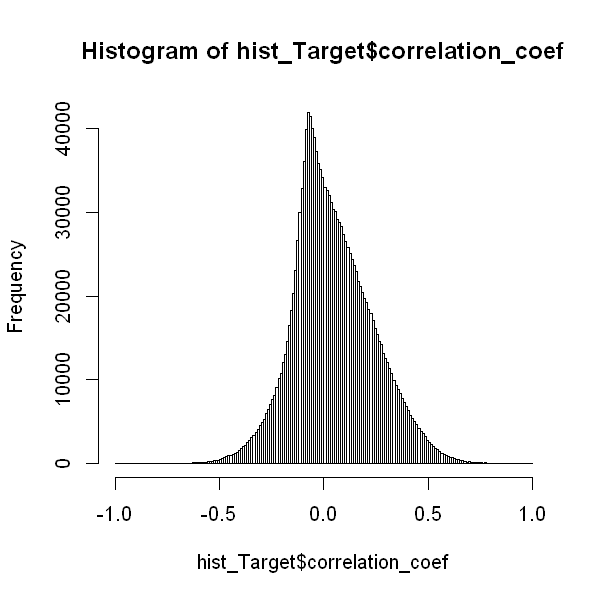

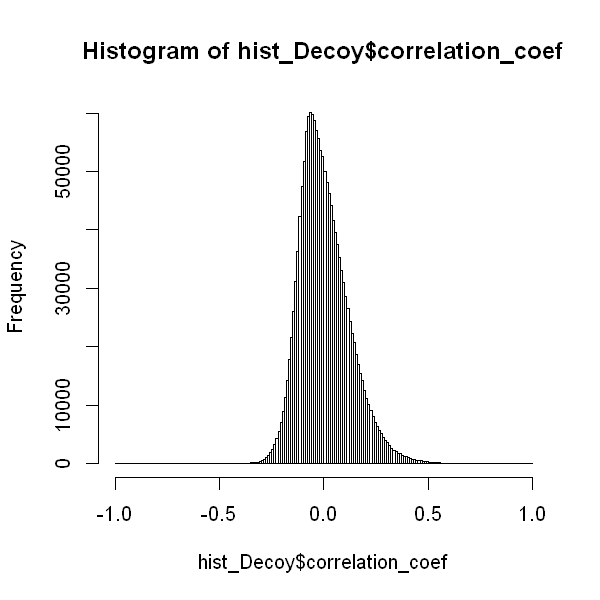

In [7]:
p1 <- hist(hist_Target$correlation_coef,breaks = seq(-1,1, length.out = 201))
p2 <- hist(hist_Decoy$correlation_coef,breaks=seq(-1,1, length.out = 201))

target_histogram <- data.frame("Breaks"=(p1$breaks[-1]),"Counts"=(p1$counts))
decoy_histogram <- data.frame("Breaks"=(p2$breaks[-1]),"Counts"=(p2$counts))

target_histogram$decoy <- 0
decoy_histogram$decoy <- 1

Run the below code as it is with commented lines to visualise the plot. **To save the plot as pdf or png**, rerun the same below code after uncommenting ('Remove #') the respective line:

null device 
          1

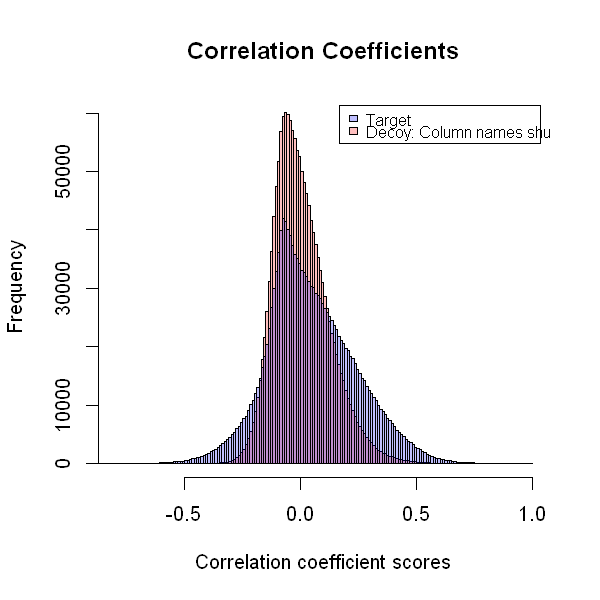

In [8]:
#pdf('Combined_histplot.pdf') #saving the plot as pdf
#png('Combined_histplot.png') #saving the plot as png
plot(p2, col=rgb(1,0,0,1/4),xlim=c(-0.8,1),main = "Correlation Coefficients", xlab="Correlation coefficient scores")  
plot( p1, col=rgb(0,0,1,1/4), 
      add=T)
legend("topright", inset=.02,
       c("Target","Decoy: Column names shuffled"), fill=c("#0000FF40","#FF000040"), horiz=F, cex=0.8)
dev.off()

### For 100% FDR:

In [ ]:
TD <- cbind(target_histogram[,-3],decoy_histogram$Counts) #combining both Target and decoy bins
colnames(TD) <- c('Breaks', 'T_C','D_C')

Here, we are considering all bin values greater than or equal to 0 from TD as Positive FDR and the bins less than 0 as Negative FDR.

In [179]:
Pos_FDR <- TD %>% filter(Breaks >= 0)
Neg_FDR <- TD %>% filter(Breaks < 0)
Pos_FDR <- Pos_FDR %>% as.data.frame() %>% arrange(desc(Breaks)) # arranging by descending order of corr coeff 
Neg_FDR <- Neg_FDR %>% as.data.frame() %>% arrange(Breaks) # arranged from smallest to largest ==> most negative to close to 0 values

head(Pos_FDR)

Breaks,T_C,D_C
1.00,9,0
0.99,1,1
0.98,1,0
0.97,5,0
0.96,2,0
0.95,4,2


In the subset version, from the TD table, we consider bin values within the range $ 0 \leq Bins < 0.8$ for Positive FDR and range $ -0.8 < Bins < 0$ for Negative FDR

In [318]:
Pos_FDR_subset <- TD %>% filter(Breaks >= 0 & Breaks < 0.8)
Neg_FDR_subset <- TD %>% filter(Breaks < 0 & Breaks > -0.8)
Pos_FDR_subset <- Pos_FDR_subset %>% as.data.frame() %>% arrange(desc(Breaks)) # arranging by descending order of corr coeff 
Neg_FDR_subset <- Neg_FDR_subset %>% as.data.frame() %>% arrange(Breaks) # arranged from smallest to largest ==> most negative to close to 0 values

head(Pos_FDR_subset)

Breaks,T_C,D_C
0.79,50,6
0.78,72,10
0.77,53,6
0.76,94,24
0.75,100,14
0.74,109,24


Now we calculate the FDR values: (Keep only FDR_subset; Remove other 2 cells)

In [181]:
Pos_FDR$fdr <- NA
for (i in 1:nrow(Pos_FDR)){
  temp <- Pos_FDR %>% filter(Breaks >= Pos_FDR$Breaks[i])
  Pos_FDR$fdr[i] <- sum(temp$D_C)/sum(temp$T_C)
}

Neg_FDR$fdr <- NA
for (i in 1:nrow(Neg_FDR)){
  temp <- Neg_FDR %>% filter(Breaks <= Neg_FDR$Breaks[i])
  Neg_FDR$fdr[i] <- sum(temp$D_C)/sum(temp$T_C)
}

Pos_FDR$round_fdr <- round(Pos_FDR$fdr, digits = 2)
Neg_FDR$round_fdr <- round(Neg_FDR$fdr, digits = 2)

head(Pos_FDR)

In [338]:
Pos_FDR_subset$fdr <- NA
for (i in 1:nrow(Pos_FDR_subset)){
  temp <- Pos_FDR_subset %>% filter(Breaks >= Pos_FDR_subset$Breaks[i])
  Pos_FDR_subset$fdr[i] <- sum(temp$D_C)/sum(temp$T_C)
}

Neg_FDR_subset$fdr <- NA
for (i in 1:nrow(Neg_FDR_subset)){
  temp <- Neg_FDR_subset %>% filter(Breaks <= Neg_FDR_subset$Breaks[i])
  Neg_FDR_subset$fdr[i] <- sum(temp$D_C)/sum(temp$T_C)
}

#rounding the fdr upto 2 digits
Pos_FDR_subset$round_fdr <- round(Pos_FDR_subset$fdr, digits = 2) 
Neg_FDR_subset$round_fdr <- round(Neg_FDR_subset$fdr, digits = 2)

head(Pos_FDR_subset)

Breaks,T_C,D_C,fdr,round_fdr,round1_fdr
0.79,50,6,0.1200000,0.12,0.1
0.78,72,10,0.1311475,0.13,0.1
0.77,53,6,0.1257143,0.13,0.1
0.76,94,24,0.1710037,0.17,0.2
0.75,100,14,0.1626016,0.16,0.2
0.74,109,24,0.1757322,0.18,0.2


Here, we subset the Positive and Negative FDR tables for $0$ to $ \pm 0.8 $ range after calculating FDR values:

In [184]:
Neg_FDR_newVal <- Neg_FDR %>% filter(Breaks > -0.8) #Specifying the limits of correlation scores for Neg_FDR 
Pos_FDR_newVal <- Pos_FDR %>% filter(Breaks < 0.8)  #Specifying the limits of correlation scores for Pos_FDR

head(Neg_FDR_newVal)

Breaks,T_C,D_C,fdr,round_fdr
-0.79,0,0,NaN,NaN
-0.78,0,0,NaN,NaN
-0.77,0,0,NaN,NaN
-0.76,1,0,0,0
-0.75,1,0,0,0
-0.74,1,0,0,0


Here, we try to plot the FDR plots with full range (-1 to 1 correlation scores) along with the FDR values subsetted before and after FDR calculation to observe the change in FDR calculation:

pdf 
  3

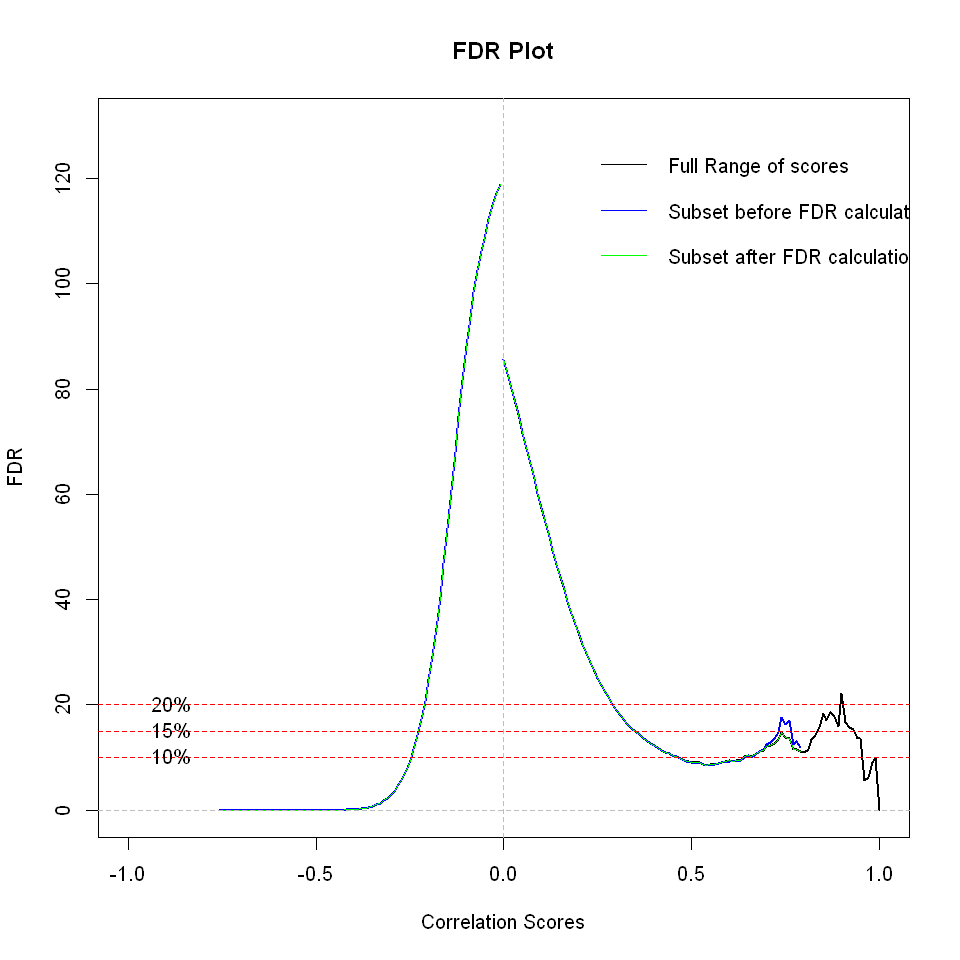

In [320]:
#svglite(filename="20220928_FDR_plot_comparison.svg") #saving the plot as svg
#png("20220928_FDR_plot_comparison.png") #saving the plot as png
plot(Pos_FDR$Breaks,((Pos_FDR$fdr)*100), xlim=c(-1,1),t='l',lwd=2.0, ylim=c(0,130), xlab = 'Correlation Scores', ylab='FDR', main='FDR Plot')
lines(Neg_FDR$Breaks,((Neg_FDR$fdr)*100),lwd=2.0)

lines(Neg_FDR_subset$Breaks,((Neg_FDR_subset$fdr)*100),lwd=2.0,col="blue")
lines(Pos_FDR_subset$Breaks,((Pos_FDR_subset$fdr)*100),lwd=2.0,col="blue")

lines(Neg_FDR_newVal$Breaks,((Neg_FDR_newVal$fdr)*100),lwd=1.0,col="green")
lines(Pos_FDR_newVal$Breaks,((Pos_FDR_newVal$fdr)*100),lwd=1.0,col="green")

abline(h=0,v=0, col="gray",lty=2)
abline(h=c(10,15,20), col="red",lty=2)
text(-0.8, c(10,15,20), c("10%","15%","20%"), pos=2, cex=1)
legend(0.2,130,   # Position
       legend = c("Full Range of scores", "Subset before FDR calculation","Subset after FDR calculation"),
       bty="n", #specifying the box type is none
       col = c("black","blue","green"), #color of the lines
       y.intersp= 1.5, #line space
       lwd = 1, #line width
       cex=1 ) # text size

dev.off()

In [339]:
FDR_full <- rbind(Neg_FDR_subset,Pos_FDR_subset) #combining both negative and positive fdr
head(FDR_full)

Breaks,T_C,D_C,fdr,round_fdr,round1_fdr
-0.79,0,0,NaN,NaN,NaN
-0.78,0,0,NaN,NaN,NaN
-0.77,0,0,NaN,NaN,NaN
-0.76,1,0,0,0,0
-0.75,1,0,0,0,0
-0.74,1,0,0,0,0


In [322]:
# Creating a Cutoff table
Cutoff_table <- data.frame(matrix(ncol = 3, nrow = 3))
colnames(Cutoff_table) <- c("FDR %","Positive Cutoff","Negative Cutoff")
Cutoff_table$"FDR %"<- c(10,15,20)

In [406]:
# listing the desired FDR values and their range
desired_FDR <- list("0.09|0.11|0.12","0.14|0.16","0.19|0.21|0.22")
desired_FDR
FDR_original <- c(0.10,0.15,0.20)

[[1]]
[1] "0.09|0.11|0.12"

[[2]]
[1] "0.14|0.16"

[[3]]
[1] "0.19|0.21|0.22"

<p style='text-align: justify;'> The below for loop gets the cutoff values using the following steps: <br>
1) If the rounded fdr values in Pos_FDR and Neg_FDR table contains the actual values of interested FDR as given in "FDR_original" &rarr; 0.10,0.15,0.20 then pick the row. When there are multiple rows with the same FDR values, go for the one with minimum FDR value. <br>
2) If the actual values are not present, look for the nearest FDR values as mentioned in the desired_FDR list and slice the corresponding row from the FDR tables as mentioned in step 1 <br>
3) Then insert the correlation score (i.e Breaks here) corresponding to the FDR into the cutoff table. When no value is present, mention it by NA</p>

In [437]:
for(i in 1:length(desired_FDR)){
    for(j in 1:length(FDR_original)){
        if(isTRUE(any(Pos_FDR_subset$round_fdr==FDR_original[i]))){
            x <- Pos_FDR_subset %>% filter(grepl(FDR_original[i],round_fdr)) %>% slice(which.min(fdr))} else{
            x <- Pos_FDR_subset %>% filter(grepl(desired_FDR[[i]], round_fdr)) %>% slice(which.min(fdr))}
        if(isTRUE(any(Neg_FDR_subset$round_fdr==FDR_original[i]))){
            y <- Neg_FDR_subset %>% filter(grepl(FDR_original[i],round_fdr)) %>% slice(which.min(fdr))} else{
            y <- Neg_FDR_subset %>% filter(grepl(desired_FDR[[i]], round_fdr)) %>% slice(which.min(fdr))}
        if(nrow(x)==0){Cutoff_table$"Positive Cutoff"[i] <- NA} else{Cutoff_table$"Positive Cutoff"[i] <- x$Breaks}
        if(nrow(y)==0){Cutoff_table$"Negative Cutoff"[i] <- NA} else{Cutoff_table$"Negative Cutoff"[i] <- y$Breaks}
    }
}

In [434]:
svglite(filename="20220929_FDR_plot_Cutoff.svg") #saving the plot as svg
#png("20220928_FDR_plot_comparison.png") #saving the plot as png
plot(FDR_full$Breaks,((FDR_full$fdr)*100), xaxt='n',xlab = 'Correlation Scores', ylab='FDR %', main='FDR Plot',pch=20)  
axis(1, at = seq(-0.8,0.8,by = 0.1), las=2)
abline(h=0,v=0, col="gray",lty=2)
abline(h=c(10,15,20), col="red",lty=2)
abline(v=Cutoff_table$'Positive Cutoff', col="blue",lty=2)
abline(v=Cutoff_table$'Negative Cutoff', col="blue",lty=2)
text(-0.6, c(10,15,20), c("10%","15%","20%"), pos=2, cex=1)

dev.off()

png 
  2

In [438]:
Cutoff_table

FDR %,Positive Cutoff,Negative Cutoff
10,0.47,-0.25
15,0.73,-0.23
20,0.29,-0.21


<font color='red'> <b> Indicate the cut-off for negative and positive correlation scores in the below cell: </b></font> Scores only above the cutoff (or below for Neg_FDR) will be selected for further processing.

In [302]:
Neg_FDR_Cutoff <- -0.2
Pos_FDR_Cutoff <- 0.4

In [ ]:
FDR_Decoy<- hist_Decoy %>% filter(correlation_coef < Neg_FDR_Cutoff & correlation_coef > Pos_FDR_Cutoff)
FDR_Target <- hist_Target %>% filter(correlation_coef < Neg_FDR_Cutoff & correlation_coef > Pos_FDR_Cutoff )

In [315]:
write.table(FDR_Decoy,"20220915_Decoy_subsetted_FDR.csv",row.names = F,quote = F)
write.table(FDR_Target,"20220915_Target_subsetted_FDR.csv",row.names = F,quote = F)